In [122]:
TRAIN_DATA = "Data/sentiment_train.csv"
TEST_DATA = "Data/sentiment_test.csv"
TRAIN_PREPROCESSED = "Data/pp_train_set.csv"
TEST_PREPROCESSED = "Data/pp_test_set.csv"

#Lexicons
BING_LIU = "lexicons/lexicons/1. BingLiu.csv"
MPQA = "lexicons/lexicons/2. mpqa.txt"
NRC_WORD = "lexicons/lexicons/8. NRC-word-emotion-lexicon.txt"
NRC_HASHTAG = "lexicons/lexicons/7. NRC-Hashtag-Sentiment-Lexicon-v0.1/unigrams-pmilexicon_NRC.txt"
SENT140 = "lexicons/lexicons/3. Sentiment140-Lexicon-v0.1/unigrams-pmilexicon.txt"

FEATURE_MATRIX = "Data/feature_matrix.npz"

#Outputs
DT_PRED = "Results/Predicted_DT.csv"
MLP_PRED = "Results/Predicted_MLP.csv"
SVM_PRED = "Results/Predicted_SVM.csv"

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
# train_data = pd.read_csv(TRAIN_DATA)
train_data = pd.read_csv(TRAIN_PREPROCESSED)

In [4]:
# test_data = pd.read_csv(TEST_DATA)
test_data = pd.read_csv(TEST_PREPROCESSED)

In [5]:
train_data.head()

,Unnamed: 0,0,1,2,3,4,5,preprocessed,preprocessed_lower,pp_for_noncontig_bi,POStagged
0,0,4,2071176921,Sun Jun 07 18:57:54 PDT 2009,NO_QUERY,gabbbbikx3,"another fire, yayy.","another fire, yayy.","another fire, yayy.","another * fire * , * yayy * .","DT NN , NN ."
1,1,4,2062877703,Sun Jun 07 00:36:03 PDT 2009,NO_QUERY,AnthonyMontero,@LoBosworth be careful lil Lo B,be careful lil Lo B,be careful lil lo b,be * careful * lil * lo * b,VB JJ JJ NNP NNP
2,2,4,2047900146,Fri Jun 05 14:21:01 PDT 2009,NO_QUERY,simplowdfan,@soapoperafan oh yes it was good. I hope you'r...,oh yes it was good. I hope you're not gonna m...,oh yes it was good. i hope you're not gonna m...,oh * yes * it * was * good * . * i * hope * yo...,UH NNS PRP VBD JJ . PRP VBP PRP VBP RB VB TO V...
3,3,0,1979945356,Sun May 31 05:07:20 PDT 2009,NO_QUERY,izzale,dont get too close or you will get hurt and i ...,dont get too close or you will get hurt and i ...,dont get too close or you will get hurt and i ...,dont * get * too * close * or * you * will * g...,"JJ VB RB RB CC PRP MD VB VBN CC VB VBP VB VB ,..."
4,4,4,1834821361,Mon May 18 04:18:41 PDT 2009,NO_QUERY,makotoichio,@Mm_Sackgirl Any big E3 plans?,Any big E3 plans?,any big e3 plans?,any * big * e3 * plans * ?,DT JJ NN NNS .


In [6]:
test_data.head()

,Unnamed: 0,0,1,2,3,4,5,preprocessed,preprocessed_lower,pp_for_noncontig_bi,POStagged
0,0,4,1676194176,Fri May 01 21:20:56 PDT 2009,NO_QUERY,JudoKickJessie,today was awesome!! body worlds museum was gre...,today was awesome!! body worlds museum was gre...,today was awesome!! body worlds museum was gre...,today * was * awesome * ! * ! * body * worlds ...,NN VBD JJ . . NN NNS NN VBD JJ . NN TO VB NNP ...
1,1,4,1754626186,Sun May 10 06:53:32 PDT 2009,NO_QUERY,mikefelker,@brownymix13 I know!! We'll be around before y...,I know!! We'll be around before ya know it th...,i know!! we'll be around before ya know it th...,i * know * ! * ! * we'll * be * around * befor...,PRP VBP . . PRP MD VB IN IN NN VBP PRP IN
2,2,0,1986069449,Sun May 31 18:16:25 PDT 2009,NO_QUERY,nkotblee,@jordanknight my sis is sad that ur not in ral...,my sis is sad that ur not in raliegh tomorrow...,my sis is sad that ur not in raliegh tomorrow...,my * sis * is * sad * that * ur * not * in * r...,PRP$ NN VBZ JJ IN JJ RB IN NN NN MD VB VB PRP ...
3,3,4,1970106366,Sat May 30 02:28:53 PDT 2009,NO_QUERY,Wikivic,Burning charcoal incense for the first time in...,Burning charcoal incense for the first time in...,burning charcoal incense for the first time in...,burning * charcoal * incense * for * the * fir...,"VBG NN NN IN DT JJ NN IN NNS , PRP$ RB JJ WRB ..."
4,4,0,1827804493,Sun May 17 11:29:01 PDT 2009,NO_QUERY,dopegirlfresh,@sherealcool good lord. i'm so sorry it wasn't...,good lord. i'm so sorry it wasn't more fun fo...,good lord. i'm so sorry it wasn't more fun fo...,good * lord * . * i'm * so * sorry * it * wasn...,JJ NN . JJ VBP RB JJ PRP VBD RB JJR NN IN PRP ...


In [7]:
#run only once
old_data = train_data
old_data_test = test_data

In [8]:
train_data = old_data[:10000]
train_data.shape
test_data = old_data_test

In [9]:
def loadLexicon(file=BING_LIU):
    if file in [BING_LIU, MPQA]:
        dic = {}
        with open(file) as f:
            for line in tqdm(f):
    #             print(line, line.split(' '))
                word, tag = line.split('\t')
                dic[word] = 1 if tag.strip() == "positive" else -1
        return dic
    elif file == NRC_WORD:
        dic = {}
        with open(file) as f:
            s = 0
            for line in tqdm(f):
                word, tag, score = line.split('\t')
                if tag == "negative":
                    s -= int(score)
                if tag == "positive":
                    s += int(score)
                    dic[word] = s
                    s = 0
        return dic
    dic = {}
    with open(file) as f:
        for line in tqdm(f):
#             print(line, line.split(' '))
            word, tag, _, _ = line.split('\t')
            dic[word] = float(tag)
    return dic

In [12]:
bingLiu = loadLexicon()
mpqa = loadLexicon(file=MPQA)
nrc_word = loadLexicon(file=NRC_WORD)
nrc_hashtag = loadLexicon(file=NRC_HASHTAG)
sent_140 = loadLexicon(file=SENT140)
lexicons = [bingLiu, mpqa, nrc_word, nrc_hashtag, sent_140]
for i in range(5):
    m = min(lexicons[i].values())
    print(m)
    lexicons[i] = (m,lexicons[i])

6789it [00:00, 849877.03it/s]
8221it [00:00, 823416.11it/s]
141820it [00:00, 1236418.91it/s]
54129it [00:00, 786549.16it/s]
62468it [00:00, 834803.58it/s]

-1
-1
-1
-6.925
-4.999


# Pre-processing

In [13]:
import nltk
from nltk.tokenize import TweetTokenizer, sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import vader
from nltk.corpus import stopwords
import re

In [26]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [14]:
tk = TweetTokenizer()

In [55]:
def preprocessing(sentence,lower=False):
    sentence = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', sentence)
    sentence = re.sub(r'http\S+', '', sentence)
    sentence = re.sub('@[^\s]+', '', sentence)
    if lower:
        sentence = sentence.lower()
    return sentence

In [56]:
def nonContiguousTokens(sentence):
    tokens = tk.tokenize(sentence)
    return ' * '.join(tokens)

# Feature creation

- Unigram DONE
- Bigram contiguous DONE
- All caps DONE
- hashtags DONE
- punctuation (! and ? DONE, start and end token DONE)
- elongated words DONE
- number of negated contexts DONE
- emoticon (pos or neg emoticon in tweet, start and end) DONE
- POS DONE

- Bigram non contiguous
- lexicons (?)


In [15]:
def ngramFeatures(preprocessed, n, min_df=5):
    #preprocessed: list of tweets
    #n is n in ngram
    count_vect = CountVectorizer(ngram_range=(n,n), tokenizer=tk.tokenize, min_df=min_df)
    count_vect.fit(preprocessed)
    return count_vect

In [16]:
def countCaps(sentence):
    tokens = tk.tokenize(sentence)
    pattern = re.compile(r"^#?[A-Z]+$")
    toks = [t for t in tokens if pattern.search(t)]
    return len(toks)

In [17]:
def countHashtags(sentence):
    return len(re.findall("#",sentence))

In [18]:
def countContPunct(sentence, choice = 0):
#     print(re.findall(r"[!?]+",sentence))
    if choice:
        tokens = tk.tokenize(sentence)
        if len(tokens) == 0:
            return 0
        if choice == 1:
            return int(re.search(r"[!]+$", tokens[-1]) is not None)
        return int(re.search(r"[?]+$", tokens[-1]) is not None)
    return len(re.findall(r"[!?]+",sentence))

In [19]:
# taken from http://sentiment.christopherpotts.net/tokenizing.html#emoticons
positive_emoticon = r'([<>]?[:;=8][\-o\*\']?[\)\]dDpP\}])|([\(\[dDpP\{][\-o\*\']?[:;=8][<>]?)'
negative_emoticon = r'([<>]?[:;=8][\-o\*\']?[\(\[/\:\{@\|\\])|([\)\]/\:\}@\|\\][\-o\*\']?[:;=8][<>]?)'

def checkEmoticons(sentence,pos=0,token=0):
    if token:
        tokens = tk.tokenize(sentence)
#         print(tokens)
        if len(tokens) == 0:
            return 0
        if pos:
            return int(re.search(positive_emoticon,tokens[-1]) is not None)
        return int(re.search(negative_emoticon,tokens[-1]) is not None)
    if pos:
        return int(re.search(positive_emoticon, sentence) is not None)
    return int(re.search(negative_emoticon, sentence) is not None)

In [20]:
def countElonWords(sentence):
    tokens = tk.tokenize(sentence)
    pattern = re.compile(r"(.)\1{2}")
    toks = [t for t in tokens if pattern.search(t)]
    return len(toks)

In [21]:
def countNeg(sentence):
    tokens = tk.tokenize(sentence)
    count = 0
    vd = vader.VaderConstants()
    for elt in tokens:
        if vd.negated([elt]):
            count += 1
    return count

In [22]:
def tagPOS(sentence):
#     tokens = tk.tokenize(sentence)
    tokens = word_tokenize(sentence)
#     print(nltk.pos_tag(tokens))
    tags = [t[1] for t in nltk.pos_tag(tokens)]
    return ' '.join(tags)

In [23]:
def getLexiconFeature(lexicon,tokens,m=-1):
    count = 0
    total = 0
    ls=0
    for token in tokens:
        if token in lexicon:
            count += 1 if lexicon[token] > 0 else 0
            total += lexicon[token]
            m = max(m, lexicon[token])
            if lexicon[token] > 0:
                ls = lexicon[token]
    return count, total, m, ls

In [24]:
def getLexiconFeatures(sentence):
    tokens = tk.tokenize(sentence)
    l = []
    for m, lex in lexicons:
        a,b,c,d = getLexiconFeature(lex,tokens,m=m)
        l = l + [a,b,c,d]
    return l

# Training & Testing data

In [267]:
#preprocess
train_data['preprocessed'] = tqdm(train_data.apply(lambda row: preprocessing(row['5']), axis=1))
train_data['preprocessed_lower'] = train_data.apply(lambda row: row['preprocessed'].lower(), axis=1)
train_data['pp_for_noncontig_bi'] = train_data.apply(lambda row: nonContiguousTokens(row['preprocessed_lower']),axis=1)
train_data['POStagged'] = train_data.apply(lambda row: tagPOS(row['preprocessed']), axis=1)
test_data['preprocessed'] = test_data.apply(lambda row: preprocessing(row['5']), axis=1)
test_data['preprocessed_lower'] = test_data.apply(lambda row: row['preprocessed'].lower(), axis=1)
test_data['pp_for_noncontig_bi'] = test_data.apply(lambda row: nonContiguousTokens(row['preprocessed_lower']),axis=1)
test_data['POStagged'] = test_data.apply(lambda row: tagPOS(row['preprocessed']), axis=1)

100%|███████████████████| 1120000/1120000 [00:00<00:00, 2648205.79it/s]


In [268]:
train_data.to_csv("Data/pp_train_set.csv")

In [269]:
test_data.to_csv("Data/pp_test_set.csv")

In [98]:
train_data.shape, test_data.shape

((10000, 11), (480000, 11))

### Feature matrix creation

In [25]:
#uni-gram features
unigram_count_vec = ngramFeatures(train_data['preprocessed_lower'].to_list()+test_data['preprocessed_lower'].to_list(),1,min_df=15)

D:\Programs\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [26]:
uni_mat = unigram_count_vec.transform(train_data['preprocessed_lower']).toarray()
print(uni_mat.shape, type(uni_mat))

(10000, 13667) <class 'numpy.ndarray'>


In [53]:
#bigram features (contiguous)
bigram_count_vec = ngramFeatures(train_data['preprocessed_lower'].to_list()+test_data['preprocessed_lower'].to_list(),2,min_df=20)

D:\Programs\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [54]:
bi_mat = bigram_count_vec.transform(train_data['preprocessed_lower']).toarray()
print(bi_mat.shape, type(bi_mat))

(10000, 35368) <class 'numpy.ndarray'>


In [55]:
#bigram features (non contiguous)
nc_bigram_count_vec = ngramFeatures(pd.concat([train_data['pp_for_noncontig_bi'],test_data['pp_for_noncontig_bi']], ignore_index = True).values.astype('U'),2,min_df=15)

D:\Programs\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [56]:
nc_bi_mat = nc_bigram_count_vec.transform(train_data['pp_for_noncontig_bi'].values.astype('U')).toarray()
print(nc_bi_mat.shape, type(nc_bi_mat))

(10000, 26077) <class 'numpy.ndarray'>


In [58]:
# POS tag features
tofit = pd.concat([train_data['POStagged'],test_data['POStagged']], ignore_index = True)
print(tofit.shape)
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect.fit(tofit.values.astype('U'))

(490000,)


CountVectorizer()

In [59]:
pos_mat = count_vect.transform(train_data['preprocessed_lower']).toarray()
print(pos_mat.shape, type(pos_mat))

(10000, 35) <class 'numpy.ndarray'>


In [60]:
#Other features
feat_mat = []

for i, row in tqdm(train_data.iterrows()):
    f = []
    f.append(countHashtags(row['preprocessed']))
    f.append(countCaps(row['preprocessed']))
    f.append(countContPunct(row['preprocessed']))
    f.append(countContPunct(row['preprocessed'],1))
    f.append(countContPunct(row['preprocessed'],2))
    f.append(countElonWords(row['preprocessed_lower']))
    f.append(checkEmoticons(row['preprocessed'],pos=1))
    f.append(checkEmoticons(row['preprocessed']))
    f.append(checkEmoticons(row['preprocessed'],token=1, pos=1))
    f.append(checkEmoticons(row['preprocessed'],token=1))
    f.append(countNeg(row['preprocessed_lower']))
    l = getLexiconFeatures(row['preprocessed_lower'])
    f.extend(l)
    feat_mat.append(f)
    
feat_mat = np.array([np.array(f) for f in feat_mat])
print(feat_mat.shape, type(feat_mat))
feat_mat
# train['countHashtags'] = train_data.apply(lambda row: countHashtags(row['preprocessed']))

# train['countCaps'] = train_data.apply(lambda row: countCaps(row['preprocessed']))

# train['countPunctuation'] = train_data.apply(lambda row: countContPunct(row['preprocessed']))
# train['lastExclamation'] = train_data.apply(lambda row: countContPunct(row['preprocessed'],1))
# train['lastQuestion'] = train_data.apply(lambda row: countContPunct(row['preprocessed'],2))

# train['countElongatedWords'] = train_data.apply(lambda row: countElon(row['preprocessed_lower']))

# train['emojiPos'] = train_data.apply(lambda row: checkEmoticons(row['preprocessed'],pos=1))
# train['emojiNeg'] = train_data.apply(lambda row: checkEmoticons(row['preprocessed']))
# train['lastEmojiPos'] = train_data.apply(lambda row: checkEmoticons(row['preprocessed'],token=1, pos=1))
# train['lastEmojiNeg'] = train_data.apply(lambda row: checkEmoticons(row['preprocessed'],token=1))

10000it [00:09, 1103.78it/s]

(10000, 31) <class 'numpy.ndarray'>


array([[ 0.   ,  0.   ,  0.   , ...,  1.808,  1.81 ,  1.81 ],
       [ 0.   ,  1.   ,  0.   , ...,  0.323,  0.4  ,  0.154],
       [ 0.   ,  1.   ,  0.   , ..., -0.824,  0.88 ,  0.039],
       ...,
       [ 0.   ,  0.   ,  1.   , ...,  2.173,  1.177,  0.183],
       [ 0.   ,  0.   ,  0.   , ...,  0.288,  0.57 ,  0.41 ],
       [ 0.   ,  0.   ,  0.   , ..., -2.54 ,  0.757,  0.109]])

In [119]:
feature_mat = np.concatenate((uni_mat, bi_mat, nc_bi_mat, pos_mat, feat_mat),axis=1)
feature_mat.shape

(10000, 75178)

In [200]:
feature_mat.shape
np.savez(FEATURE_MATRIX, feature_mat)

### Train

In [62]:
X_train = feature_mat
y_train = train_data['0'].to_numpy()
X_train.shape, y_train.shape

((10000, 75178), (10000,))

In [46]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import joblib

In [31]:
X_train_small = np.concatenate((uni_mat, pos_mat, feat_mat),axis=1)
y_train = train_data['0'].to_numpy()
print(X_train_small.shape, y_train.shape)
clf_svm = SVC(C=0.005, kernel='linear')
clf_svm.fit(X_train_small, y_train)

(10000, 13733) (10000,)


SVC(C=0.005, kernel='linear')

In [48]:
joblib_file = "SVC_model.pkl"
joblib.dump(clf_svm, joblib_file)

['SVC_model.pkl']

In [63]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
joblib_file = "DT_model.pkl"
joblib.dump(clf_dt, joblib_file)

['DT_model.pkl']

In [65]:
clf_mlp = MLPClassifier(early_stopping=True)
clf_mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True)

In [66]:
joblib_file = "MLP_model.pkl"
joblib.dump(clf_mlp, joblib_file)

['MLP_model.pkl']

### Test

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

In [33]:
y_test = test_data['0'].to_numpy()
y_test.shape

(480000,)

In [135]:
def getConfusionMatrix(y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y_test)):
        if(y_test[i] == 4 and y_pred[i] == 4):
            tp += 1
        if(y_test[i] == 4 and y_pred[i] == 0):
            fn += 1
        if(y_test[i] == 0 and y_pred[i] == 4):
            fp += 1
        if(y_test[i] == 0 and y_pred[i] == 0):
            tn += 1
    conf_mat = np.array([
            [tp, fn],
            [fp, tn]
        ])
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    if tp+fp == 0:
        precision_pos = 0
    else:
        precision_pos = tp/(tp+fp)

    if tn+fn == 0:
        precision_neg = 0
    else:
        precision_neg = tn/(tn+fn)

    if tp+fn == 0:
        recall_pos = 0
    else:
        recall_pos = tp/(tp+fn)

    if tn+fp == 0:
        recall_neg = 0
    else:
        recall_neg = tn/(tn+fp)

    precision = (precision_pos + precision_neg)/2
    recall = (recall_pos + recall_neg)/2

    if precision_pos + recall_pos == 0:
        f_pos = 0
    else:
        f_pos = 2*(precision_pos * recall_pos)/(precision_pos + recall_pos)

    if precision_neg + recall_neg == 0:
        f_neg = 0
    else:
        f_neg = 2*(precision_neg * recall_neg)/(precision_neg + recall_neg)

    f = (f_pos + f_neg)/2
#         return accuracy, precision, recall, f
    print("Accuracy:", accuracy)
    print("\nPositive Class",'-'*7)
    print("Precision:", precision_pos)
    print("Recall:", recall_pos)
    print("F-score:", f_pos)
    print("\nNegative Class",'-'*7)
    print("Precision:", precision_neg)
    print("Recall:", recall_neg)
    print("F-score:", f_neg)
    print("\nMacro average",'-'*7)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-score:", f)
    labels = ["Positive", "Negative"]
    ax = sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    ax.set(title="Confusion Matrix",
      xlabel="Predicted",
      ylabel="Gold Standard")

In [40]:
def getFeatureVector(row, ch=1):
    uni_test = unigram_count_vec.transform([row['preprocessed_lower']]).toarray()
    if ch:
        bi_test = bigram_count_vec.transform([row['preprocessed_lower']]).toarray()
        nc_bi_test = nc_bigram_count_vec.transform([row['preprocessed_lower']]).toarray()
    pos_test = count_vect.transform([row['preprocessed_lower']]).toarray()
    
    f = []
    f.append(countHashtags(row['preprocessed']))
    f.append(countCaps(row['preprocessed']))
    f.append(countContPunct(row['preprocessed']))
    f.append(countContPunct(row['preprocessed'],1))
    f.append(countContPunct(row['preprocessed'],2))
    f.append(countElonWords(row['preprocessed_lower']))
    f.append(checkEmoticons(row['preprocessed'],pos=1))
    f.append(checkEmoticons(row['preprocessed']))
    f.append(checkEmoticons(row['preprocessed'],token=1, pos=1))
    f.append(checkEmoticons(row['preprocessed'],token=1))
    f.append(countNeg(row['preprocessed_lower']))
    l = getLexiconFeatures(row['preprocessed_lower'])
    f.extend(l)
    f = np.array(f)
    f = f.reshape(1,f.shape[0])
    if ch:
        vec = np.concatenate((uni_test, bi_test, nc_bi_test, pos_test, f),axis=1)
    else:
        vec = np.concatenate((uni_test, pos_test, f),axis=1)

    return vec

In [117]:
#Sample Feature Vector for Test data
sample_test = test_data.head()
X_sample = []
for i, row in tqdm(sample_test.iterrows()):
    X_sample.append(getFeatureVector(row)[0])
X_sample = np.array(X_sample)
np.savetxt("Data/Sample_test_feature_vector.csv", X_sample, delimiter=',',fmt='%.3f')
X_sample.shape, X_sample

5it [00:00, 358.12it/s]


((5, 75178), array([[ 5.   ,  0.   ,  0.   , ...,  4.882,  1.313,  0.449],
        [ 2.   ,  0.   ,  0.   , ...,  1.506,  0.77 ,  0.017],
        [ 2.   ,  0.   ,  0.   , ..., -2.185,  1.308,  0.449],
        [ 0.   ,  0.   ,  0.   , ...,  2.865,  1.007,  0.123],
        [ 0.   ,  0.   ,  0.   , ..., -5.011,  0.825,  0.172]]))

#### Decision Tree

In [127]:
y_pred = []

In [83]:
for i, row in tqdm(test_data.iterrows()):
    X = getFeatureVector(row)
    y = clf_dt.predict(X)
    y_pred.append(y)
y_pred

480000it [27:30, 290.84it/s]


[array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], 

Accuracy: 0.7549625

Positive Class -------
Precision: 0.7673644272343677
Recall: 0.7340944201730926
F-score: 0.7503608177403472

Negative Class -------
Precision: 0.7435187707295189
Recall: 0.7759694653935553
F-score: 0.7593976041632573

Macro average -------
Precision: 0.7554415989819433
Recall: 0.7550319427833239
F-score: 0.7548792109518023


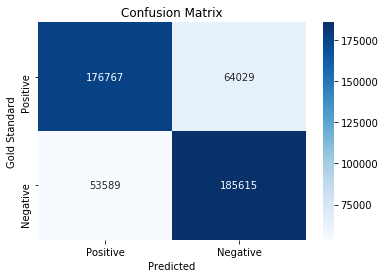

In [140]:
getConfusionMatrix(y_pred)

In [85]:
tosave = np.array(y_pred).reshape(len(y_pred), 1)
print(tosave.shape)
np.savetxt(DT_PRED, tosave, delimiter=',', fmt='%4d')

(480000, 1)


In [139]:
y_pred = pd.read_csv(DT_PRED, header=None).to_numpy()
y_pred = y_pred.reshape(1,y_pred.shape[0]).tolist()[0]

#### MLP

In [97]:
y_pred = []

In [98]:
for i, row in tqdm(test_data.iterrows()):
    X = getFeatureVector(row)
    y = clf_mlp.predict(X)
    y_pred.append(y[0])
y_pred

480000it [1:08:36, 116.60it/s]


[4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 4,


Accuracy: 0.7759395833333333

Positive Class -------
Precision: 0.7285908877246074
Recall: 0.8818668084187445
F-score: 0.7979348011926749

Negative Class -------
Precision: 0.8491304555362854
Recall: 0.6693073694419825
F-score: 0.7485710144453199

Macro average -------
Precision: 0.7888606716304465
Recall: 0.7755870889303635
F-score: 0.7732529078189974


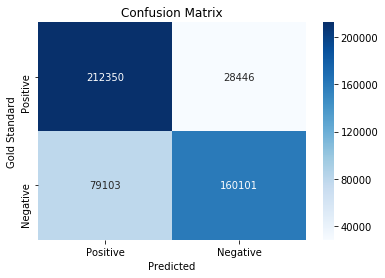

In [136]:
getConfusionMatrix(y_pred)

In [123]:
tosave = np.array(y_pred).reshape(len(y_pred), 1)
print(tosave.shape)
np.savetxt(MLP_PRED, tosave, delimiter=',', fmt='%4d')

(480000, 1)


In [131]:
y_pred = pd.read_csv(MLP_PRED, header=None).to_numpy()
y_pred = y_pred.reshape(1,y_pred.shape[0]).tolist()[0]

#### SVM

In [67]:
y_pred = []

In [68]:
for i, row in tqdm(test_data.iterrows()):
    X = getFeatureVector(row,ch=0)
    y = clf_svm.predict(X)
    y_pred.append(y)
y_pred

480000it [11:34:30, 11.52it/s]


[array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([4], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([0], 

Accuracy: 0.8001083333333333

Positive Class -------
Precision: 0.7965498603729394
Recall: 0.8078830213126464
F-score: 0.8021764140712303

Negative Class -------
Precision: 0.8037942471307755
Recall: 0.7922819016404408
F-score: 0.7979965556589513

Macro average -------
Precision: 0.8001720537518575
Recall: 0.8000824614765436
F-score: 0.8000864848650908


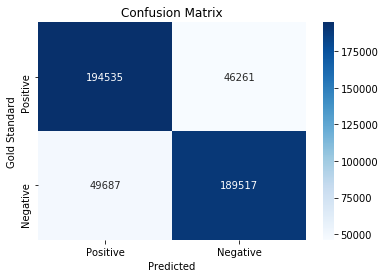

In [138]:
getConfusionMatrix(y_pred)

In [72]:
tosave = np.array(y_pred).reshape(len(y_pred), 1)
print(tosave.shape)
np.savetxt(SVM_PRED, tosave, delimiter=',', fmt='%4d')

(480000, 1)


In [137]:
y_pred = pd.read_csv(SVM_PRED, header=None).to_numpy()
y_pred = y_pred.reshape(1,y_pred.shape[0]).tolist()[0]